# (연구&보람) 결과시각화 – Experiment 1

김보람  
2024-04-03

In [1]:
import pandas as pd
import numpy as np
#import sklearn
import pickle 
import time 
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

In [3]:
df = pd.read_csv('./240423_meged.csv')
df = df[['L2' not in l and 'L1' not in l for l in df.model]]
#df['diff'] = abs(merged_df['train_frate'] - merged_df['test_frate'])
df = df[(df.test_frate <= 0.005) & (0.009 < df.train_frate) & (df.train_frate < 0.51)]

In [4]:
df

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma
14,KNeighborsUnif,NaN,0.982984,0.187500,0.726562,0.298077,0.904913,False,Autogluon,0.070000,60060,['amt'],0.097869,25740,0.004973,NaN,NaN,NaN
15,KNeighborsDist,NaN,0.980109,0.160777,0.710938,0.262248,0.885596,False,Autogluon,0.070000,60060,['amt'],0.097869,25740,0.004973,NaN,NaN,NaN
16,LightGBMXT,NaN,0.980653,0.154851,0.648438,0.250000,0.949992,False,Autogluon,0.070000,60060,['amt'],0.097869,25740,0.004973,NaN,NaN,NaN
17,LightGBM,NaN,0.985237,0.204225,0.679688,0.314079,0.963999,False,Autogluon,0.070000,60060,['amt'],0.097869,25740,0.004973,NaN,NaN,NaN
18,RandomForestGini,NaN,0.979681,0.147950,0.648438,0.240929,0.929461,False,Autogluon,0.070000,60060,['amt'],0.097869,25740,0.004973,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44700,ExtraTreesEntr,NaN,0.994760,0.122807,0.241379,0.162791,0.763820,False,Autogluon,0.008901,500499,['amt'],0.009087,13741,0.002110,NaN,NaN,NaN
44701,NeuralNetFastAI,NaN,0.997890,0.000000,0.000000,0.000000,0.917705,False,Autogluon,0.008901,500499,['amt'],0.009087,13741,0.002110,NaN,NaN,NaN
44702,XGBoost,NaN,0.996580,0.178571,0.172414,0.175439,0.939455,False,Autogluon,0.008901,500499,['amt'],0.009087,13741,0.002110,NaN,NaN,NaN
44703,NeuralNetTorch,NaN,0.997162,0.187500,0.103448,0.133333,0.941711,False,Autogluon,0.008901,500499,['amt'],0.009087,13741,0.002110,NaN,NaN,NaN


- 카테고리별로 정리, 모델별!

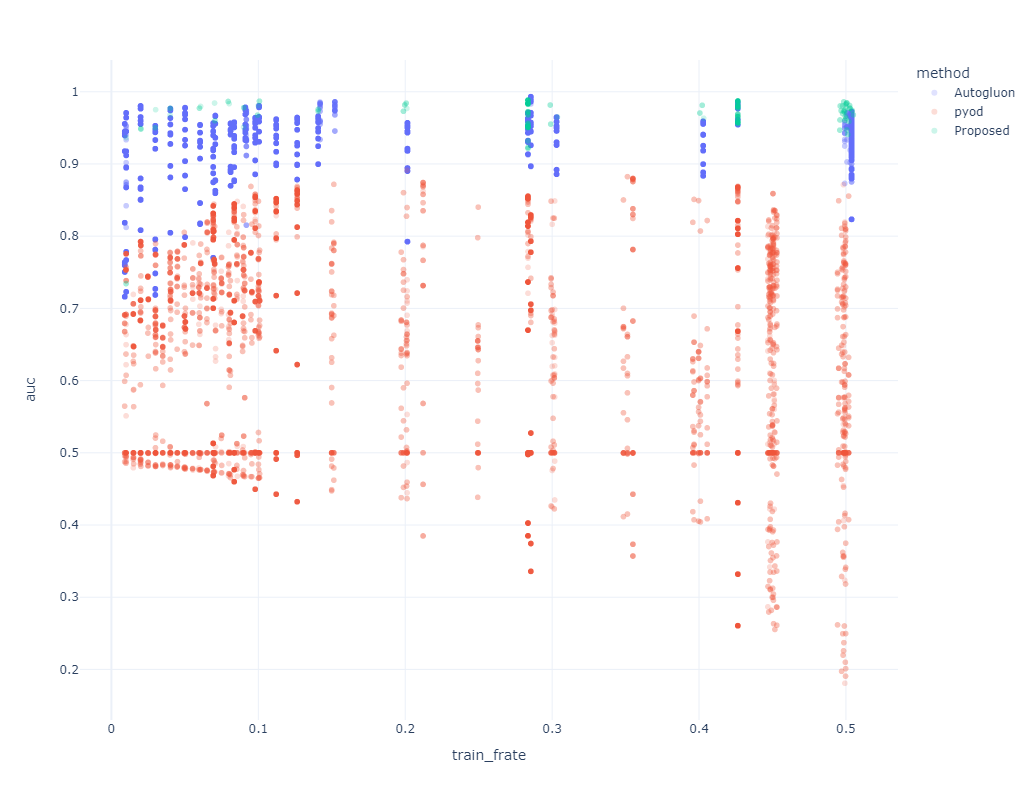

In [19]:
fig = px.scatter(
    df,
    x='train_frate',y='auc',
    color='method',
#    hover_data='f1',
    opacity=0.2,
    #---#
    width = 750,
    height = 800  
)
#fig.data[3]['marker']['opacity'] = 0.7
#fig.data[3]['marker']['size'] = 9
fig

In [10]:
df2 = pd.read_csv('./240423_meged.csv')
df2 = df[['L2' not in l and 'L1' not in l for l in df.model]]
#df['diff'] = abs(merged_df['train_frate'] - merged_df['test_frate'])
df3 = df2[(df2.test_frate <= 0.005) & (df2.train_frate <= 0.1)]

In [11]:
df3 = df3.drop_duplicates()

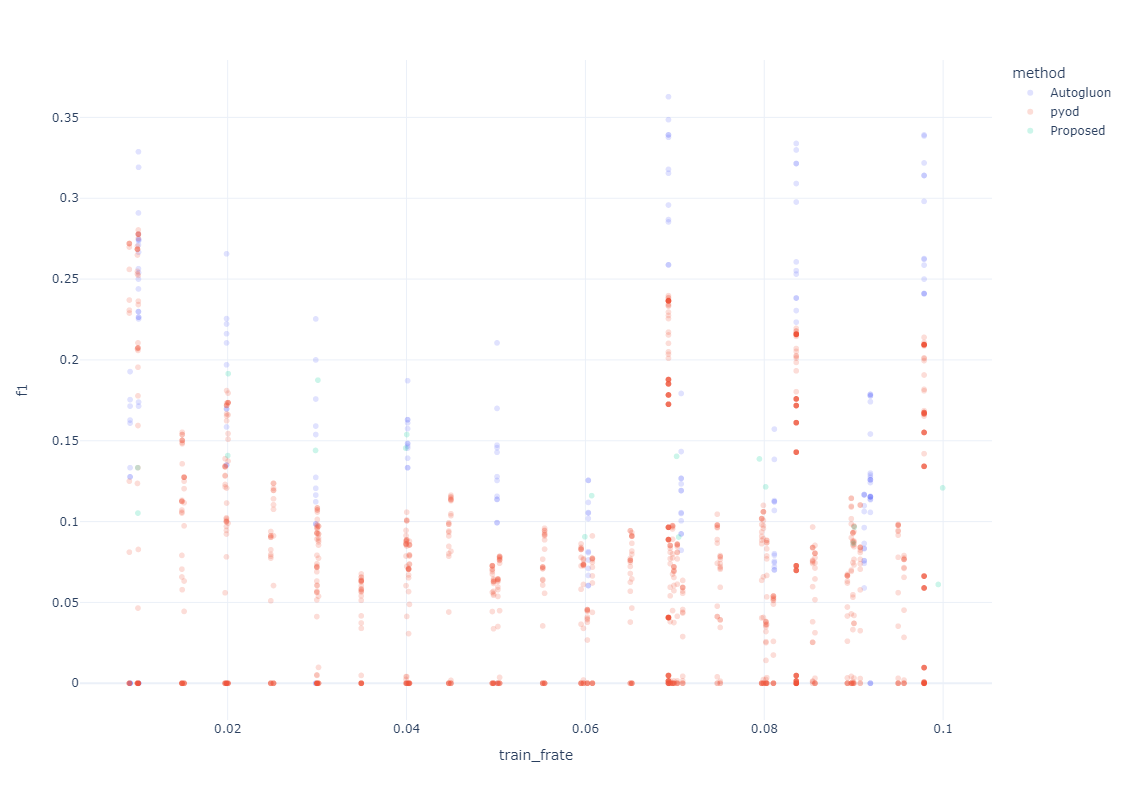

In [12]:
fig2 = px.scatter(
    df3,
    x='train_frate',y='f1',
    color='method',
#    hover_data='model',
    opacity=0.2,
    #---#
    width = 750,
    height = 800  
)
fig2